# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [190]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-02-2021.csv")
#print(df)
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-03 05:22:52,33.93911,67.709953,52586,2211,41727,5.0,Afghanistan,0.303121,4.252222
1,NaN,NaN,NaN,Albania,2021-01-03 05:22:52,41.15330,20.168300,58991,1190,34353,23448.0,Albania,2049.864480,2.017257
2,NaN,NaN,NaN,Algeria,2021-01-03 05:22:52,28.03390,1.659600,100159,2769,67611,29779.0,Algeria,228.407338,2.764604
3,NaN,NaN,NaN,Andorra,2021-01-03 05:22:52,42.50630,1.521800,8166,84,7463,619.0,Andorra,10568.821588,1.028655
4,NaN,NaN,NaN,Angola,2021-01-03 05:22:52,-11.20270,17.873900,17608,407,11189,6012.0,Angola,53.574686,2.311449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,NaN,NaN,Unknown,China,2021-01-03 05:22:52,NaN,NaN,0,0,0,0.0,"Unknown, China",0.000000,0.000000
3980,NaN,NaN,NaN,Kiribati,2021-01-03 05:22:52,-3.37040,-168.734000,0,0,0,0.0,Kiribati,0.000000,0.000000
3981,NaN,NaN,NaN,Palau,2021-01-03 05:22:52,7.51500,134.582500,0,0,0,0.0,Palau,0.000000,0.000000
3982,NaN,NaN,Cook Islands,New Zealand,2021-01-03 05:22:52,-21.23670,-159.777700,0,0,0,0.0,"Cook Islands, New Zealand",0.000000,0.000000


#### Display the top 5 rows in the data

In [191]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-03 05:22:52,33.93911,67.709953,52586,2211,41727,5.0,Afghanistan,0.303121,4.252222
1,NaN,NaN,NaN,Albania,2021-01-03 05:22:52,41.15330,20.168300,58991,1190,34353,23448.0,Albania,2049.864480,2.017257
2,NaN,NaN,NaN,Algeria,2021-01-03 05:22:52,28.03390,1.659600,100159,2769,67611,29779.0,Algeria,228.407338,2.764604
3,NaN,NaN,NaN,Andorra,2021-01-03 05:22:52,42.50630,1.521800,8166,84,7463,619.0,Andorra,10568.821588,1.028655
4,NaN,NaN,NaN,Angola,2021-01-03 05:22:52,-11.20270,17.873900,17608,407,11189,6012.0,Angola,53.574686,2.311449


#### Show the information of the dataset

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3811 non-null   object 
 3   Country_Region       3984 non-null   object 
 4   Last_Update          3984 non-null   object 
 5   Lat                  3897 non-null   float64
 6   Long_                3897 non-null   float64
 7   Confirmed            3984 non-null   int64  
 8   Deaths               3984 non-null   int64  
 9   Recovered            3984 non-null   int64  
 10  Active               3983 non-null   float64
 11  Combined_Key         3984 non-null   object 
 12  Incident_Rate        3895 non-null   float64
 13  Case_Fatality_Ratio  3940 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 435.9+ KB


#### Show the sum of missing values of features in the dataset

In [193]:
df.isnull().sum()

FIPS                   719
Admin2                 714
Province_State         173
Country_Region           0
Last_Update              0
Lat                     87
Long_                   87
Confirmed                0
Deaths                   0
Recovered                0
Active                   1
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     44
dtype: int64


Notes:
the above question can be answered as covid_data.isna().sum() also .
isna() and DataFrame. isnull() There is absolutely no difference - the source code reveals that their implementations are exactly the same. Both are used to check for missing values (NaN).

### Question 2

#### Show the number of Confirmed cases by Country

In [194]:
df.groupby("Country_Region")["Confirmed"].sum().reset_index()


,Country_Region,Confirmed
0,Afghanistan,52586
1,Albania,58991
2,Algeria,100159
3,Andorra,8166
4,Angola,17608
...,...,...
189,Vietnam,1482
190,West Bank and Gaza,140287
191,Yemen,2101
192,Zambia,21230


Notes: reset_index() displayed the first row (0,1,2)
pandas. reset_index in pandas is used to reset index of the dataframe object to default indexing (0 to number of rows minus 1) or to reset multi level index. By doing so, the original index gets converted to a column.

#### Show the number of Deaths by Country

In [195]:
df.groupby("Country_Region")["Deaths"].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,2211
1,Albania,1190
2,Algeria,2769
3,Andorra,84
4,Angola,407
...,...,...
189,Vietnam,35
190,West Bank and Gaza,1446
191,Yemen,610
192,Zambia,392


#### Show the number of Recovered cases by Country

In [196]:
df.groupby("Country_Region")["Recovered"].sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,41727
1,Albania,34353
2,Algeria,67611
3,Andorra,7463
4,Angola,11189
...,...,...
189,Vietnam,1337
190,West Bank and Gaza,120403
191,Yemen,1396
192,Zambia,18942


#### Show the number of Active Cases by Country

In [197]:
df.groupby("Country_Region")["Active"].sum().reset_index()

,Country_Region,Active
0,Afghanistan,5.0
1,Albania,23448.0
2,Algeria,29779.0
3,Andorra,619.0
4,Angola,6012.0
...,...,...
189,Vietnam,110.0
190,West Bank and Gaza,18438.0
191,Yemen,95.0
192,Zambia,1896.0


above was my answer , below is logic as per the Sir . Still wondering why so ?

In [198]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
result = df.groupby('Country_Region')['Active'].sum().reset_index()
result

,Country_Region,Active
0,Afghanistan,8648
1,Albania,23448
2,Algeria,29779
3,Andorra,619
4,Angola,6012
...,...,...
189,Vietnam,110
190,West Bank and Gaza,18438
191,Yemen,95
192,Zambia,1896


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [199]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df.groupby("Country_Region")[["Confirmed","Deaths","Recovered","Active"]].sum()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,52586,2211,41727,8648
Albania,58991,1190,34353,23448
Algeria,100159,2769,67611,29779
Andorra,8166,84,7463,619
Angola,17608,407,11189,6012
...,...,...,...,...
Vietnam,1482,35,1337,110
West Bank and Gaza,140287,1446,120403,18438
Yemen,2101,610,1396,95


### Question 3

### Show the countries with no recovered cases

Notes:
another approach as per Sir ,
data = df.groupby('Country_Region')['Recovered'].sum().reset_index()
result = data[data['Recovered']==0][['Country_Region', 'Recovered']]
result 
gives rhe same result.

In [200]:
numbers_by_country = df.groupby("Country_Region").agg({"Recovered":['sum']})
numbers_by_country.columns = ["Recovered_Total"]
numbers_by_country.query('Recovered_Total == 0')




,Recovered_Total
Country_Region,
Belgium,0
Kiribati,0
Palau,0
Serbia,0
Summer Olympics 2020,0
Sweden,0
US,0


#### Show the countries with no confirmed cases

In [201]:
numbers_by_country = df.groupby("Country_Region").agg({"Confirmed":['sum']})
numbers_by_country.columns = ["Confirmed"]
numbers_by_country.query('Confirmed == 0')

,Confirmed
Country_Region,
Kiribati,0
Palau,0
Summer Olympics 2020,0


#### Show the countries with no deaths

In [202]:
numbers_by_country = df.groupby("Country_Region").agg({"Deaths":['sum']})
numbers_by_country.columns = ["Deaths_Total"]
numbers_by_country.query('Deaths_Total == 0')

,Deaths_Total
Country_Region,
Bhutan,0
Cambodia,0
Dominica,0
Grenada,0
Holy See,0
Kiribati,0
Laos,0
Marshall Islands,0
Palau,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [218]:
df1= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv', usecols = ['Last_Update', 'Country_Region', 'Confirmed', 'Deaths', 'Recovered'])
df1.columns
#confirmed_cases = df1.groupby("Country_Region")[["Last_Update","Confirmed","Deaths","Recovered"]].sum()
#confirmed_cases.sort_values('Confirmed', ascending=False).head(10)

Index(['Country_Region', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [221]:
result = df1.groupby('Country_Region').max().sort_values(by='Confirmed', ascending=False)[:10]
pd.set_option('display.max_column', None)
result

,Last_Update,Confirmed,Deaths,Recovered
Country_Region,,,,
France,2021-01-10 05:22:12,2762120,67229,178036
United Kingdom,2021-01-10 05:22:12,2613838,70541,2850
Turkey,2021-01-10 05:22:12,2317118,22631,2190047
India,2021-01-10 05:22:12,1965556,50027,1861400
Argentina,2021-01-10 05:22:12,1714409,44417,1504330
Brazil,2021-01-10 05:22:12,1540513,48298,1350513
Poland,2021-01-10 05:22:12,1376389,31011,1113738
Iran,2021-01-10 05:22:12,1280438,56100,1067466
South Africa,2021-01-10 05:22:12,1214176,32824,956712


#### Show the Top 10 Countries with Active cases

In [222]:
df1['Active'] = df1['Confirmed'] - df1['Deaths'] - df1['Recovered']
#active_cases = df.groupby("Country_Region")[["Confirmed","Deaths","Recovered","Active"]].sum()
#active_cases.sort_values('Active', ascending=False).head(10)
result = df1.groupby('Country_Region').max().sort_values(by='Active', ascending=False)[:10]
pd.set_option('display.max_column', None)
result 

,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
United Kingdom,2021-01-10 05:22:12,2613838,70541,2850,2543297
France,2021-01-10 05:22:12,2762120,67229,178036,2516855
US,2021-04-02 15:13:53,907077,12090,0,894987
Peru,2021-01-10 05:22:12,454697,42786,966447,411911
Spain,2021-01-10 05:22:12,421295,11971,40736,368588
Serbia,2021-01-10 05:22:12,356125,3513,0,352612
Mexico,2021-01-10 05:22:12,364770,20251,1143254,346710
Poland,2021-01-10 05:22:12,1376389,31011,1113738,231640
South Africa,2021-01-10 05:22:12,1214176,32824,956712,224640


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

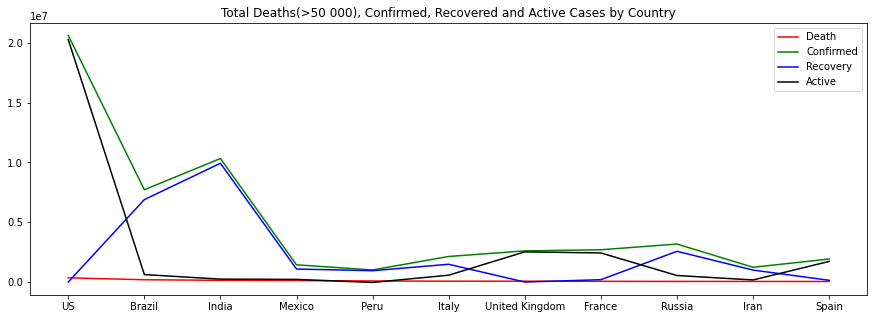

In [206]:
import matplotlib.pyplot as plt 
data = df.groupby(["Country_Region"])[["Deaths", "Confirmed", "Recovered", "Active"]].sum().reset_index()
data = data.sort_values(by='Deaths', ascending=False)
data = data[data['Deaths']>50000]
plt.figure(figsize=(15, 5))
plt.plot(data['Country_Region'], data['Deaths'],color='red')
plt.plot(data['Country_Region'], data['Confirmed'],color='green')
plt.plot(data['Country_Region'], data['Recovered'], color='blue')
plt.plot(data['Country_Region'], data['Active'], color='black')
plt.legend(["Death","Confirmed","Recovery","Active"]) 
plt.title('Total Deaths(>50 000), Confirmed, Recovered and Active Cases by Country')
plt.show()


### Question 6

### Plot Province/State wise Deaths in USA

In [207]:
import plotly.express as px

In [208]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [209]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [210]:
us_data = covid_data[covid_data['Country_Region']=='US']
death_by_state = us_data.groupby(["Province_State"])[["Deaths"]].sum().reset_index()
death_by_state
fig = px.bar(death_by_state,x = 'Province_State',y= 'Deaths',text ='Deaths',title='State wise deaths reported of COVID 19 in USA')
fig.show()




### Question 7

### Plot Province/State Wise Active Cases in USA

In [211]:
us_data = covid_data[covid_data['Country_Region']=='US']
death_by_state = us_data.groupby(["Province_State"])[["Active"]].sum().reset_index()
death_by_state
fig = px.bar(death_by_state,x = 'Province_State',y= 'Active',text ='Active',title='State Wise Recovery Cases of COVID-19 in USA')
fig.show()


### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [229]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-02-2021.csv')
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
combine_us_data = covid_data[covid_data['Country_Region']=='US'].drop(['Country_Region'], axis=1)
combine_us_data = combine_us_data[combine_us_data.sum(axis = 1) > 0]
combine_us_data.columns
combine_us_data = combine_us_data.groupby(['Province_State'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
combine_us_data = pd.melt(combine_us_data, id_vars='Province_State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
fig = px.bar(combine_us_data, x='Province_State', y='Count', text='Count', barmode='group', color='Case', title='USA State wise combine number of confirmed, deaths, recovered, active COVID-19 cases')
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [ ]:
import plotly.express as px
import plotly.io as pio

In [ ]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [231]:
grouped = covid_data.groupby('Last_Update')[['Last_Update', 'Confirmed', 'Deaths']].sum().reset_index()
fig = px.line(grouped, x="Last_Update", y="Confirmed",
             title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
fig.show()